# ZNF462
[Weiss-Kruszka syndrome (WSKA)](https://omim.org/entry/618619) is caused by heterozygous mutation in the [ZNF462](https://omim.org/entry/617371) gene.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-12-12
Using gpsea version 0.9.2


### ZNF462
We used the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for ZNF462.

In [2]:
gene_symbol = 'ZNF462'
mane_tx_id = 'NM_021224.6'
mane_protein_id = 'NP_067047.4' # zinc finger protein 462 isoform 1

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.23") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
validation.summarize()

Individuals Processed: 100%|██████████| 39/39 [00:11<00:00,  3.52 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
32,Ptosis
29,Global developmental delay
22,Broad philtrum
20,Highly arched eyebrow
19,Downslanted palpebral fissures
19,Exaggerated cupid's bow
18,Delayed speech and language development
17,Anteverted nares
17,Bulbous nose
16,Motor delay


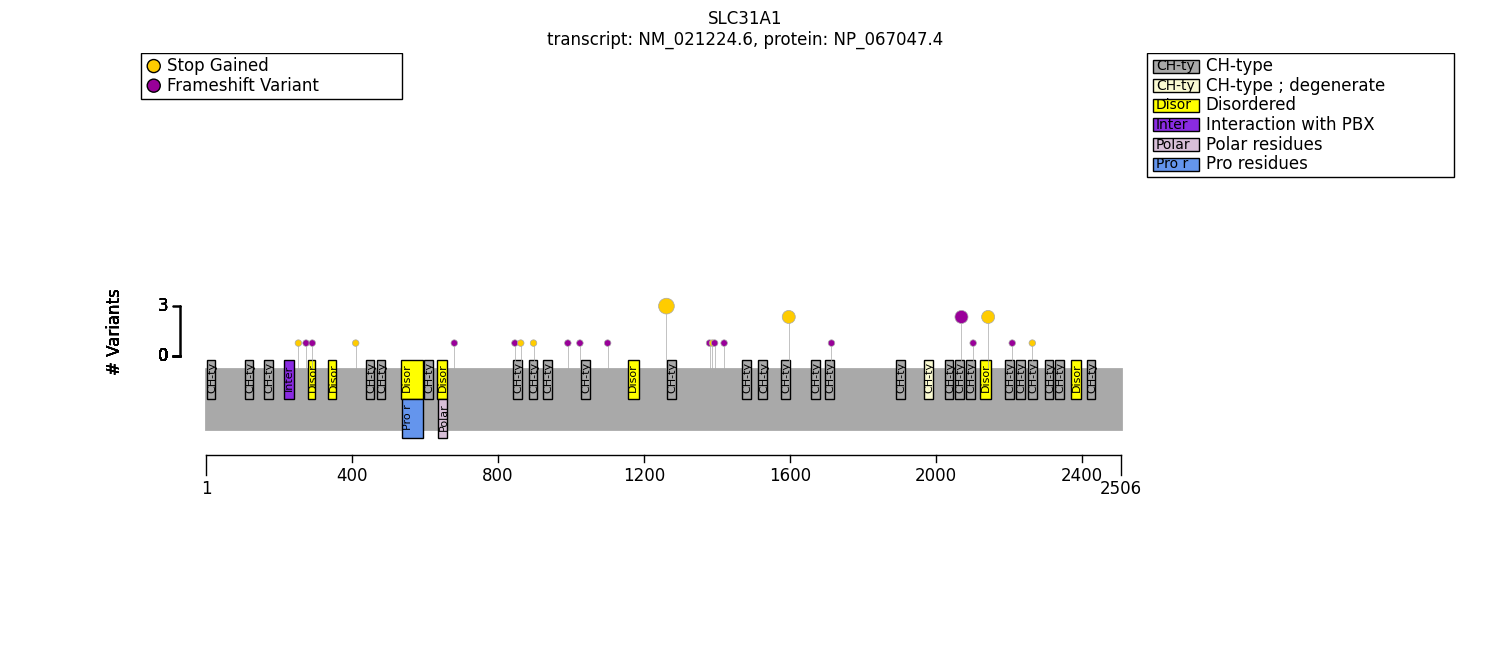

In [6]:
from gpsea.model.genome import GRCh38
from gpsea.model import ProteinMetadata
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)

protein_meta = ProteinMetadata.from_uniprot_json(
        protein_id=mane_protein_id,
        label="SLC31A1",
        uniprot_json="Q96JM2.json",
        protein_length=2506,
)

znf462_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
znf462_fig.tight_layout()

# Genotype-Phenotype Correlation (GPC) Analysis
All published variants belong to categories that are often considered to be loss of function (FRAMESHIFT_VARIANT, TRANSCRIPT_ABLATION, STOP_GAINED, SPLICE_ACCEPTOR_VARIANT). We will test transcript ablation and the most commonly reported variant.

In [7]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [8]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_effect
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.view import MtcStatsViewer

ablation = variant_effect(VariantEffect.TRANSCRIPT_ABLATION, mane_tx_id)
abl_clf = monoallelic_classifier(
    a_predicate=ablation,
    b_predicate=~ablation,
    a_label="Ablation",
    b_label="Other"
)
abl_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=abl_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(abl_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,14
HMF03,Skipping term because of a child term with the same individual counts,8
HMF05,Skipping term because one genotype had zero observations,5
HMF08,Skipping general term,42
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,60


In [9]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=abl_result)

Allele group                                       Ablation          Other  \
                                                      Count Percent  Count   
Delayed speech and language development [HP:000...      0/4      0%  18/30   
Prominent metopic ridge [HP:0005487]                    0/4      0%  14/31   
Hearing impairment [HP:0000365]                         3/5     60%   7/29   
Low-set ears [HP:0000369]                               2/4     50%   6/26   
Intellectual disability [HP:0001249]                    3/4     75%  11/28   
Feeding difficulties [HP:0011968]                       1/6     17%  13/28   
Exaggerated cupid's bow [HP:0002263]                    3/4     75%  16/29   
Highly arched eyebrow [HP:0002553]                      2/5     40%  18/31   
Broad philtrum [HP:0000289]                             5/7     71%  17/30   
Neurodevelopmental abnormality [HP:0012759]             6/6    100%  24/24   
Abnormal eyebrow morphology [HP:0000534]                2/2    100%  18/18   
Abnormal ocular adnexa morphology [HP:0030669]          3/3    100%  24/24   
Neurodevelopmental delay [HP:0012758]                   6/6    100%  23/23   
Motor delay [HP:0001270]                                2/4     50%  14/30   
Global developmental delay [HP:0001263]                 6/7     86%  23/30   
Ptosis [HP:0000508]                                     5/6     83%  27/31   
Epicanthus [HP:0000286]                                 1/4     25%  12/30   
Abnormal eyelid morphology [HP:0000492]                 2/2    100%  20/20   
Downslanted palpebral fissures [HP:0000494]             2/4     50%  17/30   
Slanting of the palpebral fissure [HP:0200006]          2/2    100%  17/17   
Anteverted nares [HP:0000463]                           3/6     50%  14/30   
Abnormal nostril morphology [HP:0005288]                3/3    100%  14/14   
Abnormal nasal morphology [HP:0005105]                  3/3    100%  14/14   
Abnormal morphology of the nasal alae [HP:0000429]      3/3    100%  14/14   
Abnormal external nose morphology [HP:0010938]          3/3    100%  14/14   
Abnormality of upper lip vermillion [HP:0011339]        3/3    100%  16/16   
Abnormal upper lip morphology [HP:0000177]              5/5    100%  17/17   
Abnormality of the philtrum [HP:0000288]                5/5    100%  17/17   
Bulbous nose [HP:0000414]                               3/6     50%  14/30   
Abnormal nasal tip morphology [HP:0000436]              3/3    100%  14/14   

Allele group                                                                   \
                                                   Percent Corrected p values   
Delayed speech and language development [HP:000...     60%                1.0   
Prominent metopic ridge [HP:0005487]                   45%                1.0   
Hearing impairment [HP:0000365]                        24%                1.0   
Low-set ears [HP:0000369]                              23%                1.0   
Intellectual disability [HP:0001249]                   39%                1.0   
Feeding difficulties [HP:0011968]                      46%                1.0   
Exaggerated cupid's bow [HP:0002263]                   55%                1.0   
Highly arched eyebrow [HP:0002553]                     58%                1.0   
Broad philtrum [HP:0000289]                            57%                1.0   
Neurodevelopmental abnormality [HP:0012759]           100%                1.0   
Abnormal eyebrow morphology [HP:0000534]              100%                1.0   
Abnormal ocular adnexa morphology [HP:0030669]        100%                1.0   
Neurodevelopmental delay [HP:0012758]                 100%                1.0   
Motor delay [HP:0001270]                               47%                1.0   
Global developmental delay [HP:0001263]                77%                1.0   
Ptosis [HP:0000508]                                    87%                1.0   
Epicanthus [HP:0000286]                      

In [11]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo, mf_result)

Sex                                                FEMALE           MALE  \
                                                    Count Percent  Count   
Delayed speech and language development [HP:000...    2/9     22%  16/25   
Highly arched eyebrow [HP:0002553]                   8/10     80%  11/25   
Hearing impairment [HP:0000365]                      4/10     40%   4/22   
Feeding difficulties [HP:0011968]                     5/9     56%   8/23   
Hypotonia [HP:0001252]                               5/10     50%   8/25   
Motor delay [HP:0001270]                              3/9     33%  13/25   
Intellectual disability [HP:0001249]                  5/9     56%   9/23   
Anteverted nares [HP:0000463]                         5/9     56%  10/25   
Bulbous nose [HP:0000414]                             5/9     56%  10/25   
Global developmental delay [HP:0001263]               6/9     67%  20/25   
Downslanted palpebral fissures [HP:0000494]           6/9     67%  13/25   
Broad philtrum [HP:0000289]                           6/9     67%  14/25   
Neurodevelopmental abnormality [HP:0012759]           7/7    100%  20/20   
Abnormal eyebrow morphology [HP:0000534]              8/8    100%  11/11   
Abnormal ocular adnexa morphology [HP:0030669]        9/9    100%  17/17   
Neurodevelopmental delay [HP:0012758]                 6/6    100%  20/20   
Language impairment [HP:0002463]                      2/2    100%  16/16   
Abnormal communication [HP:0034434]                   2/2    100%  16/16   
Abnormal speech pattern [HP:0002167]                  2/2    100%  16/16   
Ptosis [HP:0000508]                                  9/10     90%  21/25   
Epicanthus [HP:0000286]                               3/9     33%  10/25   
Abnormal eyelid morphology [HP:0000492]               7/7    100%  15/15   
Slanting of the palpebral fissure [HP:0200006]        6/6    100%  13/13   
Exaggerated cupid's bow [HP:0002263]                  5/8     62%  14/25   
Abnormality of upper lip vermillion [HP:0011339]      5/5    100%  14/14   
Abnormal upper lip morphology [HP:0000177]            6/6    100%  14/14   
Prominent metopic ridge [HP:0005487]                 4/10     40%  10/25   
Abnormality of the philtrum [HP:0000288]              6/6    100%  14/14   

Sex                                                                            \
                                                   Percent Corrected p values   
Delayed speech and language development [HP:000...     64%           0.996461   
Highly arched eyebrow [HP:0002553]                     44%           0.996461   
Hearing impairment [HP:0000365]                        18%           1.000000   
Feeding difficulties [HP:0011968]                      35%           1.000000   
Hypotonia [HP:0001252]                                 32%           1.000000   
Motor delay [HP:0001270]                               52%           1.000000   
Intellectual disability [HP:0001249]                   39%           1.000000   
Anteverted nares [HP:0000463]                          40%           1.000000   
Bulbous nose [HP:0000414]                              40%           1.000000   
Global developmental delay [HP:0001263]                80%           1.000000   
Downslanted palpebral fissures [HP:0000494]            52%           1.000000   
Broad philtrum [HP:0000289]                            56%           1.000000   
Neurodevelopmental abnormality [HP:0012759]           100%           1.000000   
Abnormal eyebrow morphology [HP:0000534]              100%           1.000000   
Abnormal ocular adnexa morphology [HP:0030669]        100%           1.000000   
Neurodevelopmental delay [HP:0012758]                 100%           1.000000   
Language impairment [HP:0002463]                      100%           1.000000   
Abnormal communication [HP:0034434]                   100%           1.000000   
Abnormal speech pattern [HP:0002167]                  100%           1.000000   
Ptosis [HP:0000508

# Summary

In [12]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

ft_results = (
    GPAnalysisResultSummary.from_multi(
        result=abl_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=mf_result
    ),
)

caption = """No statistically significant genotype phenotype association was identified."""
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=ft_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [13]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
Ablation,Other,30,0
Genotype (A),Genotype (B),Tests performed,Significant tests
FEMALE,MALE,28,0


In [14]:
summarizer.process_latex(report=report, protein_fig=znf462_fig)

Figure saved to ../../supplement/img/ZNF462_protein_diagram-draft.pdf
Output to ../../supplement/tex/ZNF462_summary_draft.tex
